# Pandas笔记

In [1]:
import pandas as pd
import numpy as np

# 创建序列

In [2]:
s = pd.Series([1, 3, 6, np.nan, 44, 1])
print(s)

0     1.0
1     3.0
2     6.0
3     NaN
4    44.0
5     1.0
dtype: float64


# 创建DataFrame

In [23]:
#导入方式1
dates = pd.date_range('20190101', periods=6)
print(dates)
df = pd.DataFrame(np.random.randn(6,4), index = dates, columns=['a','b','c','d'])
print(df)
#导入方式2
data = pd.DataFrame(np.arange(12).reshape(3, 4))
print(data)
#自定义字典方式
df2 = pd.DataFrame({'A': 1.,
                   'B': pd.Timestamp('20130102'),
                   'C': pd.Series(1, index=list(range(4)),dtype='float32'),
                   'D': np.array([3]*4,dtype='int32'),
                   'E': pd.Categorical(["test",'train','test', 'train']),
                   'F': 'foo'})
print(df2)
#输出每列数据类型
df2.dtypes
#输出inde
df2.index
#输出column
df2.columns
#输出values
df2.values
#输出描述
df2.describe()
#输出转置矩阵
df2.T

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06'],
              dtype='datetime64[ns]', freq='D')
                   a         b         c         d
2019-01-01  0.673687 -0.775197 -0.820807  0.928025
2019-01-02 -0.144599 -1.363089 -2.501501 -0.023218
2019-01-03 -0.713431 -0.361618 -0.310305  0.638569
2019-01-04  0.468018  0.056090  0.659282 -0.083221
2019-01-05 -0.173816  2.131823  0.095165 -0.372606
2019-01-06  0.570283 -0.497360  0.291808  0.074582
   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


,0,1,2,3
A,1,1,1,1
B,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00
C,1,1,1,1
D,3,3,3,3
E,test,train,test,train
F,foo,foo,foo,foo


## 排序

In [28]:
print(df2)
#按index排序
df2.sort_index(axis=1, ascending=False)
df2.sort_index(axis=0, ascending=False)
#按某一列值排序
df2.sort_values(by='E',ascending=False)

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


,A,B,C,D,E,F
3,1.0,2013-01-02,1.0,3,train,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
0,1.0,2013-01-02,1.0,3,test,foo


## 选择数据

In [30]:
dates = pd.date_range('20130101', periods=6)
df3 = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates,columns=['A','B','C','D'])
print(df3)

             A   B   C   D
2013-01-01   0   1   2   3
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23


In [36]:
# 选择某一列
print(df3['A'])

2013-01-01     0
2013-01-02     4
2013-01-03     8
2013-01-04    12
2013-01-05    16
2013-01-06    20
Freq: D, Name: A, dtype: int32


In [40]:
# 选择多行
df3[0:3]

,A,B,C,D
2013-01-01,0,1,2,3
2013-01-02,4,5,6,7
2013-01-03,8,9,10,11


## 通过标签选择数据:loc

In [45]:
print(df3.loc['20130102'])
print(df3.loc[ : , ['A', 'B']])
print(df3.loc['20130102', ['A', 'B']])

A    4
B    5
C    6
D    7
Name: 2013-01-02 00:00:00, dtype: int32
             A   B
2013-01-01   0   1
2013-01-02   4   5
2013-01-03   8   9
2013-01-04  12  13
2013-01-05  16  17
2013-01-06  20  21
A    4
B    5
Name: 2013-01-02 00:00:00, dtype: int32


## 通过位置选择：iloc

In [50]:
print(df3)
print(df3.iloc[3,1])#选择第3行第1列的数,从0行0列开始
print(df3.iloc[:, :2])#选择第0和第1列
print(df3.iloc[0:2, :])#选择第0和第1行

             A   B   C   D
2013-01-01   0   1   2   3
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23
13
             A   B
2013-01-01   0   1
2013-01-02   4   5
2013-01-03   8   9
2013-01-04  12  13
2013-01-05  16  17
2013-01-06  20  21
            A  B  C  D
2013-01-01  0  1  2  3
2013-01-02  4  5  6  7


## ~~多方式选择数据：ix(该方式现已不被支持)~~

In [52]:
print(df3)
print(df3.ix[:3, ['A', 'C']])

             A   B   C   D
2013-01-01   0   1   2   3
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23
            A   C
2013-01-01  0   2
2013-01-02  4   6
2013-01-03  8  10


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


## Bool布尔选择数据(条件筛选)

In [60]:
print(df3)
print(df3[df3.A > 8])#筛选出A列中大于8的数据

             A   B   C   D
2013-01-01   0   1   2   3
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23
             A   B   C   D
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23


## 处理缺失值

In [70]:
dates = pd.date_range('20130101',periods=6)
df4 = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates,columns =['A','B','C','D'])
df4.iloc[0, 1] = np.nan
df4.iloc[1, 2] = np.nan
print(df4)
#丢弃存在缺失值的行
print(df4.dropna(axis=0, how='any'))
#丢弃存在缺失值的列
print(df4.dropna(axis=1, how='any'))
#丢弃全为缺失值的列
print(df4.dropna(axis=1, how='all'))
#填充缺失值为0
print(df4.fillna(value = 0))
#填充缺失值为该列的平均值
print(df4.fillna(df4.mean()))
#检测缺失值
print(df4.isnull())

             A     B     C   D
2013-01-01   0   NaN   2.0   3
2013-01-02   4   5.0   NaN   7
2013-01-03   8   9.0  10.0  11
2013-01-04  12  13.0  14.0  15
2013-01-05  16  17.0  18.0  19
2013-01-06  20  21.0  22.0  23
             A     B     C   D
2013-01-03   8   9.0  10.0  11
2013-01-04  12  13.0  14.0  15
2013-01-05  16  17.0  18.0  19
2013-01-06  20  21.0  22.0  23
             A   D
2013-01-01   0   3
2013-01-02   4   7
2013-01-03   8  11
2013-01-04  12  15
2013-01-05  16  19
2013-01-06  20  23
             A     B     C   D
2013-01-01   0   NaN   2.0   3
2013-01-02   4   5.0   NaN   7
2013-01-03   8   9.0  10.0  11
2013-01-04  12  13.0  14.0  15
2013-01-05  16  17.0  18.0  19
2013-01-06  20  21.0  22.0  23
             A     B     C   D
2013-01-01   0   0.0   2.0   3
2013-01-02   4   5.0   0.0   7
2013-01-03   8   9.0  10.0  11
2013-01-04  12  13.0  14.0  15
2013-01-05  16  17.0  18.0  19
2013-01-06  20  21.0  22.0  23
             A     B     C   D
2013-01-01   0  13.0   2.0   3

## 导入导出数据

In [ ]:
#读取
pd.read_csv(path,seq='\t')#用于读txt文本文件时需定义seq=''定义分割符
pd.read_excel(path,)
pd.read_html(path,)
#导出
pd.to_csv(path,)
pd.to_excel(path,)

## 合并

In [73]:
df11 = pd.DataFrame(np.ones((3, 4))*0, columns=['a','b','c','d'])
df22 = pd.DataFrame(np.ones((3, 4))*1, columns=['a','b','c','d'])
df33 = pd.DataFrame(np.ones((3, 4))*2, columns=['a','b','c','d'])
print(df11, df22, df33)
print(pd.concat([df11,df22,df33],axis=0))

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0      a    b    c    d
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0      a    b    c    d
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0
     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0


## merge合并

In [76]:
left = pd.DataFrame({'key':['k0', 'k2', 'k3', 'k4'],
              'A':[1, 2, 3, 4],
              'B':[5, 6, 7, 8],
              'C':[2, 4, 6, 8]})
right = pd.DataFrame({'key':['k0', 'k2', 'k3', 'k4'],
              'E':[1, 2, 3, 4],
              'F':[5, 6, 7, 8],
              'G':[2, 4, 6, 8]})
total = pd.merge(left, right, on='key')
print(total)

  key  A  B  C  E  F  G
0  k0  1  5  2  1  5  2
1  k2  2  6  4  2  6  4
2  k3  3  7  6  3  7  6
3  k4  4  8  8  4  8  8


## plot图表

In [77]:
import matplotlib.pyplot as plt

0      -0.038758
1       1.194976
2       2.895250
3       2.915834
4       0.501214
5       2.511664
6       1.231022
7       0.981318
8      -1.260096
9      -1.165160
10     -0.403735
11     -2.105983
12     -1.554743
13     -0.055939
14     -0.527321
15     -0.978687
16     -0.069414
17     -1.383085
18     -1.659076
19     -1.973426
20     -2.910417
21     -2.427762
22     -2.326099
23     -0.364917
24      0.245591
25     -0.097504
26     -1.501229
27     -1.875637
28     -1.486811
29     -1.187960
         ...    
970    14.658425
971    14.023073
972    14.684753
973    14.482177
974    14.698712
975    14.611241
976    12.517253
977    11.545272
978    11.685023
979    10.714326
980     9.366165
981     8.245778
982     8.341156
983     8.598774
984     8.622185
985    10.172707
986     8.785854
987     8.500791
988     8.197383
989     7.213132
990     5.074362
991     4.967236
992     6.220900
993     6.473351
994     7.345129
995     6.189166
996     7.517184
997     5.8936

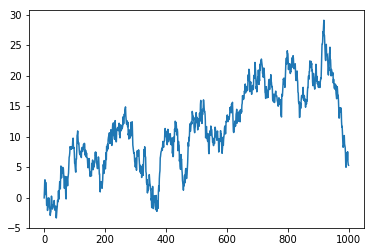

In [79]:
data = pd.Series(np.random.randn(1000),index=np.arange(1000))
data = data.cumsum()
print(data)
data.plot()
plt.show()